In [89]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import networkx as nx
import tweepy
import pickle
import IPython.display as dp
import urllib.request
import io
from PIL import Image
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [5]:
with open('data/edges.bin', 'rb') as fp:
    edges = pickle.loads(fp.read())

with open('data/visited.bin', 'rb') as fp:
    visited = pickle.loads(fp.read())

with open('data/crawl_frontier.bin', 'rb') as fp:
    crawl_frontier = pickle.loads(fp.read())

In [7]:
g = nx.from_edgelist(edges)
ranks = nx.pagerank(g)

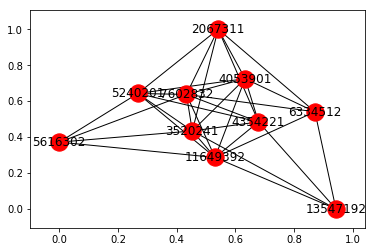

In [30]:
ranked = list(sorted(ranks, key=ranks.get, reverse=True))
g.remove_nodes_from(ranked[10:])
nx.draw_networkx(g)

In [33]:
import config
auth = tweepy.OAuthHandler(config.consumer_key, config.consumer_secret)
auth.set_access_token(config.access_token_key, config.access_token_secret)
api = tweepy.API(auth)

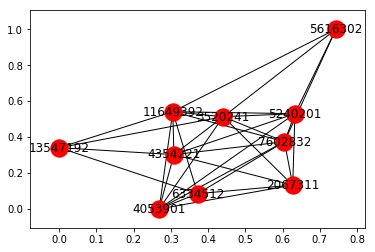

In [51]:
for user_id in g.nodes():
    status = api.get_user(user_id)
    file = io.BytesIO(urllib.request.urlopen(status.profile_image_url).read())
    g.node[user_id]['image']= Image.open(file)

nx.draw_networkx(g)

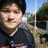

In [52]:
g.node[11649392]['image']

In [82]:
pos

{2067311: array([ 0.75045623,  0.87760608]),
 3520241: array([ 0.39296744,  0.6047578 ]),
 4053901: array([ 0.66443425,  0.72962844]),
 4354221: array([ 0.60749571,  0.51526201]),
 5240201: array([ 0.38892206,  1.        ]),
 5616302: array([ 0.        ,  0.87980853]),
 6334512: array([ 0.79597329,  0.43675743]),
 7602832: array([ 0.43022365,  0.77990695]),
 11649392: array([ 0.38018901,  0.46216433]),
 13547192: array([ 0.71104423,  0.        ])}

In [83]:
pos = nx.spring_layout(g)

edge_trace = go.Scatter(
    x=[],
    y=[],
    line=go.Line(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in g.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += [x0, x1, None]
    edge_trace['y'] += [y0, y1, None]

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=go.Marker(
        showscale=True,
        # colorscale options
        # 'Greys' | 'Greens' | 'Bluered' | 'Hot' | 'Picnic' | 'Portland' |
        # Jet' | 'RdBu' | 'Blackbody' | 'Earth' | 'Electric' | 'YIOrRd' | 'YIGnBu'
        colorscale='YIGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

for node in g.nodes():
    x, y = pos[node]
    node_trace['x'].append(x)
    node_trace['y'].append(y)

In [91]:
fig = go.Figure(data=go.Data([edge_trace, node_trace]))
plotly.offline.iplot(fig)

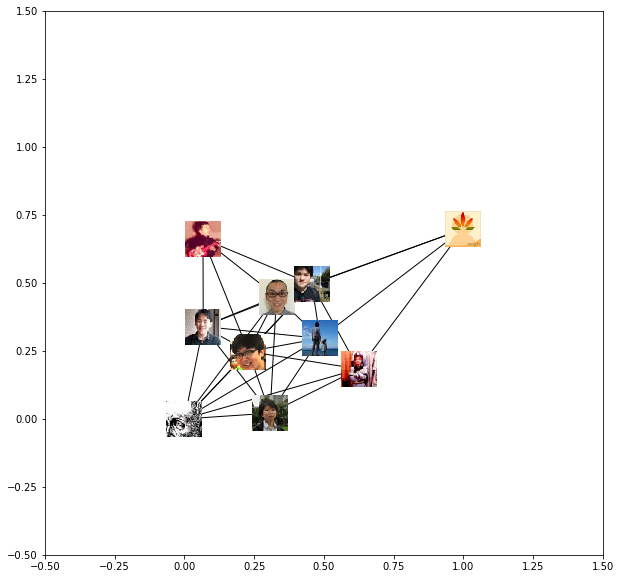

In [68]:
pos = nx.spring_layout(g)

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
# ax.set_aspect('equal')
nx.draw_networkx_edges(g, pos, ax=ax, arrows=True, zorder=10)

plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)

trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform

piesize=0.05 # this is the image size
p2=piesize/2.0
for user_id in g.nodes():
   xa, ya = trans2(trans(pos[user_id]))
   a = plt.axes([xa-p2,ya-p2, piesize, piesize])
#    a.set_aspect('equal')
   a.imshow(g.node[user_id]['image'], zorder=1)
   a.axis('off')